#Handwritten Digit Recognition using Convolutional Neural Networks with Pytorch

## Summary

--------------------------------------------------------------------
**Step 1: The Setup**
--------------------------------------------------------------------

**Target:**
1.	Ensure the correct setup.
2.	Define the necessary transformations.
3.	Configure the data loader.
4.	Establish the foundation of the code.
5.	Implement the basic training and testing loop.
6.	Establish a robust skeleton structure, minimizing subsequent modifications if possible.

**Results:**
1.	Parameters: 190K
2.	Best Training Accuracy: 98.57
3.	Best Test Accuracy: 98.95
**Analysis:**
1.	The model appears to be relatively heavy or over-parameterized considering the complexity of the problem it is addressing.


## Load srouce code files from git

In [11]:
import os, sys, importlib

user = "Paurnima-Chavan"
repo = "mnist-S7"
src_dir = "src"

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

Cloning into 'mnist-S7'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 5.29 KiB | 1.76 MiB/s, done.


In [3]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from utils import train, test,plot_dataset_images, plot_train_test_accuracy_loss
from dataset import load_minst_data
from models import Net_1, model_summary

## Load MNIST Dataset

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
#------------- added below code
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? True


device(type='cuda')

In [5]:
train_loader , test_loader = load_minst_data(batch_size=128)

100%|██████████| 9912422/9912422 [00:00<00:00, 155278099.89it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 112370773.49it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35653886.86it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4635165.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



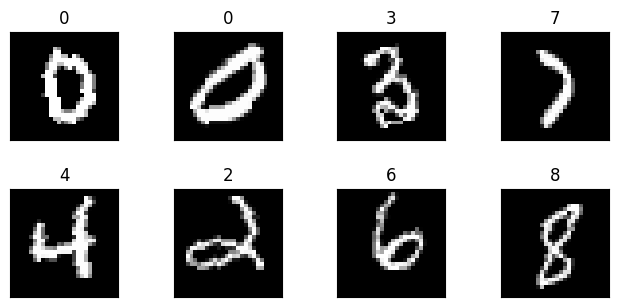

In [6]:
plot_dataset_images(train_loader, 8)

## Load the model

### Model1

In [7]:
model = Net_1().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,496
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,856
              ReLU-6          [-1, 128, 22, 22]               0
            Conv2d-7           [-1, 32, 22, 22]           4,128
            Conv2d-8           [-1, 64, 20, 20]          18,496
              ReLU-9           [-1, 64, 20, 20]               0
        MaxPool2d-10           [-1, 64, 10, 10]               0
           Conv2d-11            [-1, 128, 8, 8]          73,856
             ReLU-12            [-1, 128, 8, 8]               0
           Conv2d-13             [-1, 10, 8, 8]           1,290
             ReLU-14             [-1, 1

## Train the Model

### Model1

In [9]:
from tqdm import tqdm

from utils import reset_variables
model = Net_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20
criterion = F.nll_loss
reset_variables()

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.3020 Batch_id=468 Accuracy=10.21: 100%|██████████| 469/469 [00:25<00:00, 18.19it/s]


Test set: Average loss: 0.0181, Accuracy: 980/10000 (9.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.8083 Batch_id=468 Accuracy=31.16: 100%|██████████| 469/469 [00:26<00:00, 17.63it/s]


Test set: Average loss: 0.0039, Accuracy: 8635/10000 (86.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1650 Batch_id=468 Accuracy=88.83: 100%|██████████| 469/469 [00:27<00:00, 17.22it/s]


Test set: Average loss: 0.0012, Accuracy: 9553/10000 (95.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1692 Batch_id=468 Accuracy=93.61: 100%|██████████| 469/469 [00:26<00:00, 17.88it/s]


Test set: Average loss: 0.0009, Accuracy: 9660/10000 (96.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1466 Batch_id=468 Accuracy=95.11: 100%|██████████| 469/469 [00:26<00:00, 17.90it/s]


Test set: Average loss: 0.0006, Accuracy: 9756/10000 (97.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1062 Batch_id=468 Accuracy=95.67: 100%|██████████| 469/469 [00:25<00:00, 18.20it/s]


Test set: Average loss: 0.0008, Accuracy: 9692/10000 (96.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1537 Batch_id=468 Accuracy=96.08: 100%|██████████| 469/469 [00:25<00:00, 18.13it/s]


Test set: Average loss: 0.0005, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0578 Batch_id=468 Accuracy=96.67: 100%|██████████| 469/469 [00:26<00:00, 18.01it/s]


Test set: Average loss: 0.0006, Accuracy: 9761/10000 (97.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.2294 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:26<00:00, 17.93it/s]


Test set: Average loss: 0.0005, Accuracy: 9814/10000 (98.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1087 Batch_id=468 Accuracy=97.13: 100%|██████████| 469/469 [00:27<00:00, 17.22it/s]


Test set: Average loss: 0.0005, Accuracy: 9828/10000 (98.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0498 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:26<00:00, 17.82it/s]


Test set: Average loss: 0.0004, Accuracy: 9827/10000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0737 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:25<00:00, 18.21it/s]


Test set: Average loss: 0.0005, Accuracy: 9823/10000 (98.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0923 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:26<00:00, 17.73it/s]


Test set: Average loss: 0.0004, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0147 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0004, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0077 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:26<00:00, 17.95it/s]


Test set: Average loss: 0.0003, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1027 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:26<00:00, 17.55it/s]


Test set: Average loss: 0.0003, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0448 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]


Test set: Average loss: 0.0003, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0210 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0003, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1829 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:26<00:00, 17.84it/s]


Test set: Average loss: 0.0003, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0150 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:26<00:00, 17.43it/s]


Test set: Average loss: 0.0003, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Plot model performance

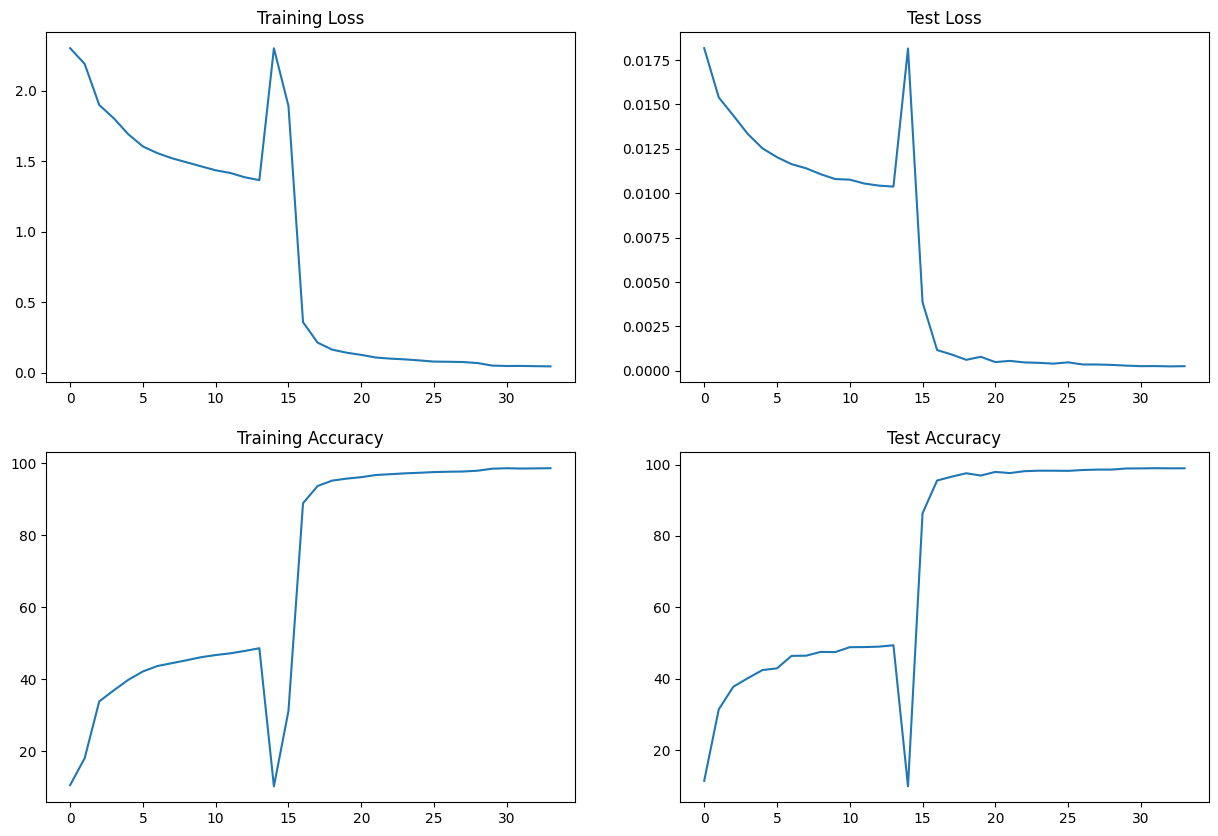

In [10]:
plot_train_test_accuracy_loss()